@eidepozo

De 05B_participantes: 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('participants_ext.csv')

Se utilizaran las consultas: 0, 1, 4*, 5, 11, 12, 15, 19, 23, 26, 28 y 29 para los tres modelos.

In [3]:
df

,FK_student_nick,query,snippet1,snippet2,snippet3,sum_cos,MMR_score
0,aarriagada,como construir un automovil,Cómo construir un auto deportivo con poco dine...,"Construir un motor de automóvil desde cero, ll...",Relájate y disfruta en HD del proceso de ensam...,0.090246,-0.013984
1,cduarte,soapbox,Soapbox is a Chrome extension that enables any...,SoapBox is an app designed to help managers ha...,A soapbox is a raised platform on which one st...,0.300216,-0.004925
2,abastian,Crear un auto básico,This feature is not available right now. Pleas...,PARA HACER CAPAS MIRA EL Anexo a Curso de Auto...,Crear un diagrama de flujo. En el menú Archivo...,0.011189,0.027738
3,ocontreras,Como construir un automovi,"Construir un motor de automóvil desde cero, ll...",Cómo construir un auto deportivo con poco dine...,"Fases. Antes de producir un vehículo, ha de co...",0.079059,0.000189
4,gcurguan,Como construir un auto de carreras,QUIERES FORMAR PARTE DE LA MEJOR NETWORK DE YO...,Un auto de carrera puede ser un juego o un obj...,UN COCHE DE CARRERAS DEFINICIÓN DEL PROYECTO. ...,0.144053,-0.031535
5,mcarep,construir automovil derby soapbox,Fácil Soap Box Derby coche construir Estas ins...,Sobre soap box derby de coches Soap box derby ...,3rd Annual Nevada City Soap Box Derby. 3rd Ann...,0.423954,-0.023827
6,eespinoza,como construir un automovil de carrerqas,Construye un automóvil de carreras casero y se...,Un auto de carrera puede ser un juego o un obj...,Estudiantes de la Universidad Politécnica Sale...,0.136630,-0.068315
7,gandrade,que debe tener mi auto para competir en nascar?,Están preparados para competir más de 500 mill...,Hay una frase muy importante en estados Unidos...,NASCAR hace referencia a las siglas en inglés ...,0.195299,-0.020022
8,jfernandez,asd,Anchorage School District website accessibilit...,Tip: Incorrect ASD file association errors can...,Definición de ASD en el Diccionario de español...,0.088782,0.003169
9,bcortes,componentes de un automovil,El primer viaje largo en un automóvil lo reali...,COMPONENTES DE UN AUTOMOVIL 1. PistónFoto de u...,Curso Mecánica: Experto en Autopartes | Compon...,0.058460,0.024384


In [4]:
from gensim.models import Word2Vec

In [5]:
modelA = Word2Vec.load('modelA/word2vec.modelA')
modelB = Word2Vec.load('modelB/word2vec.modelB')
modelC = Word2Vec.load('modelC/word2vec.modelC')                       

In [6]:
vocab = list(modelC.wv.vocab)
display(len(vocab))

662

In [7]:
file_names = ['00', '01', '04', '05', '11', '12', '15', '19', '23', '26', '28', '29']

In [8]:
modelA_q = [] # iterable df para cada query
modelB_q = []
modelC_q = []

In [9]:
for name in file_names:
    modelA_q.append(pd.read_csv('modelA/query_'+name+'.csv'))
    modelB_q.append(pd.read_csv('modelB/query_'+name+'.csv'))
    modelC_q.append(pd.read_csv('modelC/query_'+name+'.csv'))

In [10]:
last_w = ['automovil', 'soapbox', 'básico', 'carreras', 'soapbox', 'auto', 'automovil', 'autos', 'auto',
         'auto', 'carreras', 'automovil', 'soapbox']
ulast_w = ['automovil', 'soapbox', 'básico', 'carreras', 'auto', 'autos']

In [11]:
word_added = [] # iterable para evaluar vocabularios post modelo

In [12]:
for ele in range(len(file_names)):
    aux = pd.concat([modelA_q[ele]['word_added'],
                                 modelB_q[ele]['word_added'], modelC_q[ele]['word_added']], axis=1)
    aux.columns=['model_A', 'model_B', 'model_C']
    word_added.append(aux)

In [13]:
ref = {
    0: 0,
    1: 1,
    2: 4,
    3: 5,
    4: 11,
    5: 12,
    6: 15,
    7: 19,
    8: 23,
    9: 26,
    10: 28,
    11: 29,
}

In [14]:
#df.iloc[ref[3]]#[5] acceso por user
#modelB_q[3][modelB_q[3]['sum_cos']<=df.iloc[ref[3]][5]].sort_values(by=['sum_cos'])#.describe()

FK_student_nick                                               mcarep
query                              construir automovil derby soapbox
snippet1           Fácil Soap Box Derby coche construir Estas ins...
snippet2           Sobre soap box derby de coches Soap box derby ...
snippet3           3rd Annual Nevada City Soap Box Derby. 3rd Ann...
sum_cos                                                     0.423954
MMR_score                                                 -0.0238275
Name: 5, dtype: object

In [15]:
modelB_q[3][modelB_q[3]['sum_cos']<=df.iloc[ref[3]][5]].sort_values(by=['sum_cos'])[['word_added','sum_cos']][:15]

,word_added,sum_cos
2,bull,0.037465
27,noviembre,0.051458
41,super,0.060575
5,box,0.083265
25,blue,0.085464
43,vez,0.098246
7,world,0.125036
19,carros,0.129043
46,racer,0.134712
10,grid,0.143534


In [16]:
sum_cos1 = pd.concat([modelB_q[0][0:10]['sum_cos'],modelB_q[1][0:10]['sum_cos'],modelB_q[2][0:10]['sum_cos'],
                      modelB_q[3][0:10]['sum_cos'],modelB_q[4][0:10]['sum_cos'],modelB_q[5][0:10]['sum_cos'],
                      modelB_q[6][0:10]['sum_cos'],modelB_q[7][0:10]['sum_cos'],modelB_q[8][0:10]['sum_cos'],
                      modelB_q[9][0:10]['sum_cos'], modelB_q[10][0:10]['sum_cos'], modelB_q[11][0:10]['sum_cos']])

In [17]:
sum_cos2 = pd.concat([modelB_q[0][10:20]['sum_cos'],modelB_q[1][10:20]['sum_cos'],modelB_q[2][10:20]['sum_cos'],
                      modelB_q[3][10:20]['sum_cos'],modelB_q[4][10:20]['sum_cos'],modelB_q[5][10:20]['sum_cos'],
                      modelB_q[6][10:20]['sum_cos'],modelB_q[7][10:20]['sum_cos'],modelB_q[8][10:20]['sum_cos'],
                      modelB_q[9][10:20]['sum_cos'], modelB_q[10][10:20]['sum_cos'], modelB_q[11][10:20]['sum_cos']])

In [18]:
sum_cos3 = pd.concat([modelB_q[0][20:30]['sum_cos'],modelB_q[1][20:30]['sum_cos'],modelB_q[2][20:30]['sum_cos'],
                      modelB_q[3][20:30]['sum_cos'],modelB_q[4][20:30]['sum_cos'],modelB_q[5][20:30]['sum_cos'],
                      modelB_q[6][20:30]['sum_cos'],modelB_q[7][20:30]['sum_cos'],modelB_q[8][20:30]['sum_cos'],
                      modelB_q[9][20:30]['sum_cos'], modelB_q[10][20:30]['sum_cos'], modelB_q[11][20:30]['sum_cos']])

In [19]:
sum_cos4 = pd.concat([modelB_q[0][30:40]['sum_cos'],modelB_q[1][30:40]['sum_cos'],modelB_q[2][30:40]['sum_cos'],
                      modelB_q[3][30:40]['sum_cos'],modelB_q[4][30:40]['sum_cos'],modelB_q[5][30:40]['sum_cos'],
                      modelB_q[6][30:40]['sum_cos'],modelB_q[7][30:40]['sum_cos'],modelB_q[8][30:40]['sum_cos'],
                      modelB_q[9][30:40]['sum_cos'], modelB_q[10][30:40]['sum_cos'], modelB_q[11][30:40]['sum_cos']])

In [20]:
sum_cos5 = pd.concat([modelB_q[0][40:50]['sum_cos'],modelB_q[1][40:50]['sum_cos'],modelB_q[2][40:50]['sum_cos'],
                      modelB_q[3][40:50]['sum_cos'],modelB_q[4][40:50]['sum_cos'],modelB_q[5][40:50]['sum_cos'],
                      modelB_q[6][40:50]['sum_cos'],modelB_q[7][40:50]['sum_cos'],modelB_q[8][40:50]['sum_cos'],
                      modelB_q[9][40:50]['sum_cos'], modelB_q[10][40:50]['sum_cos'], modelB_q[11][40:50]['sum_cos']])

In [21]:
sum_cos5.describe()

count    120.000000
mean       0.156934
std        0.165899
min        0.000000
25%        0.057445
50%        0.095968
75%        0.178979
max        0.749234
Name: sum_cos, dtype: float64

In [22]:
sum_cos_means_g1 = [0.183570, 0.193830, 0.190552, 0.144644, 0.156934] #promedio suma de cosenos

In [23]:
import numpy as np

In [24]:
np.mean(sum_cos_means_g1)

0.173906

In [25]:
word_added[3]['model_B'] # 50 palabras ordenadas para la consulta 0 segun cada modelo

0          race
1           red
2          bull
3         derby
4       carrera
5           box
6          soap
7         world
8           car
9        racing
10         grid
11        locos
12        build
13         cars
14         cdmx
15       coches
16       driver
17     pinewood
18        event
19       carros
20        stock
21      domingo
22         best
23     santiago
24       little
25         blue
26      primera
27    noviembre
28     american
29     carreras
30       méxico
31        autos
32       annual
33        mundo
34          one
35    divertida
36        chile
37           ca
38     official
39      realiza
40    argentina
41        super
42         cabo
43          vez
44         city
45        anual
46        racer
47        youth
48         pack
49      gravity
Name: model_B, dtype: object

In [26]:
#https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns

def uniqueness(word_added, idx):
    unique = list(pd.unique(word_added[idx][['model_A', 'model_B', 'model_C']].values.ravel('K')))
    unique_df = pd.DataFrame(unique, columns=['word'])
    unique_df['model_A'] = unique_df['word'].isin(word_added[idx]['model_A'])
    unique_df['model_B'] = unique_df['word'].isin(word_added[0]['model_B'])
    unique_df['model_C'] = unique_df['word'].isin(word_added[0]['model_C'])
    return unique_df
    
    

In [27]:
uniqueness(word_added, 11)

,word,model_A,model_B,model_C
0,race,True,False,False
1,red,True,False,False
2,bull,True,False,False
3,carrera,True,False,False
4,derby,True,False,False
...,...,...,...,...
70,make,False,False,False
71,versión,False,False,False
72,design,False,False,False
73,país,False,False,False


In [80]:
modelB_pair = pd.DataFrame()

In [81]:
for i in range(len(file_names)):
    case =  modelB_q[i][['similarity_w','sum_cos']]
    modelB_pair = pd.concat([modelB_pair, case])

In [82]:
modelB_pair = modelB_pair.reset_index(drop=True)

In [84]:
#modelB_pair.to_csv('g1_modelB_pairs.csv', index=False)

In [28]:
#unique_df[unique_df['model_A'] == False]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def query_scatter_plot(index, user_id, df): # al tratar con df debe indicarse el usuario puntual
    plot_0 = modelA_q[index].plot.scatter(x='similarity_w', y='sum_cos', title=df.iloc[user_id][1], figsize=(10,5), label='Modelo A')
    modelB_q[index].plot.scatter(x='similarity_w', y='sum_cos', ax=plot_0, color='green', label="Modelo B")
    modelC_q[index].plot.scatter(x='similarity_w', y='sum_cos', ax=plot_0, color='orange', label="Modelo C")
    plot_0.axhline(y=df.iloc[user_id][5], color ='r',  label= "{:.6f}".format(df.iloc[user_id][5]))
    plot_0.legend(loc=1)

In [31]:
keylist = list(ref)

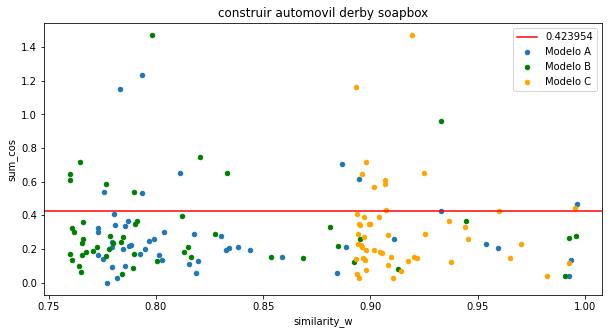

In [32]:
query_scatter_plot(keylist[3],ref[3], df) # A : B

In [33]:
len(modelA_q[0][modelA_q[0]['sum_cos']<= df.iloc[0][5]].index)/len(modelA_q[0].index)*100

76.0

In [34]:
similarity_df = pd.DataFrame()

In [35]:
modelA_q[0]

,word_added,s1,s2,s3,similarity_w,sum_cos
0,principales,Desde que el diseñador dibuja hasta que los in...,"La fabricación de un coche se divide, fundamen...",La fabricación de automóviles se refiere a la ...,0.999048,0.084272
1,gasolina,Si bien el de gasolina tras la adaptación se c...,Invento Coche: El inventor del primer coche de...,Roger comenzó a construir automóviles Benz tam...,0.998833,0.156374
2,motores,Es difícil encontrar un buen motor de 200 hp p...,La fabricación de automóviles se refiere a la ...,"En este reportaje, vamos a ver cómo se fabrica...",0.998812,0.099818
3,elementos,Desde que el diseñador dibuja hasta que los in...,"Las puertas, el techo y los paneles de la carr...","En este reportaje, vamos a ver cómo se fabrica...",0.998788,0.021424
4,todas,Desde que el diseñador dibuja hasta que los in...,La fabricación de automóviles se refiere a la ...,4.- Motores Esta es otra de las partes fundame...,0.998783,0.036611
5,conjunto,Desde que el diseñador dibuja hasta que los in...,"AUTOS, VEHÍCULOS, TOPS, LOS MEJORES TOPS, IMPR...",Desde aquellas primeras fábricas de coches has...,0.998773,0.030857
6,chasis,Materiales y procesos de la fabricación de cha...,Descubre cómo está hecho el chasis de un carro...,Construir un bólido por ti mismo no sólo puede...,0.998725,0.088069
7,además,"En este reportaje, vamos a ver cómo se fabrica...","Además del empresarios, hay otros 12 imputados...","AUTOS, VEHÍCULOS, TOPS, LOS MEJORES TOPS, IMPR...",0.998673,0.068991
8,mantenimiento,"El instructor de mecánica automotriz, Julio Is...","Es, con mucho, el mantenimiento preventivo más...",Es importante saber qué debe hacer para el man...,0.998659,0.211489
9,esenciales,Los 8 pasos esenciales para crear un auto. 13 ...,Relájate y disfruta en HD del proceso de ensam...,La construcción real de vehículo se efectúa en...,0.998619,0.040334


In [36]:
for i in range(len(file_names)):
    aux_list = [modelA_q[i]['similarity_w'].mean(), modelA_q[i]['similarity_w'].std(), modelB_q[i]['similarity_w'].mean(),
            modelB_q[i]['similarity_w'].std(), modelC_q[i]['similarity_w'].mean(), modelC_q[i]['similarity_w'].std()]
    aux_df = pd.DataFrame([aux_list])
    similarity_df = pd.concat([similarity_df, aux_df])
    

In [37]:
similarity_df = similarity_df.rename(columns={0: "modelA_mean", 1: "modelA_std", 2: "modelB_mean", 3: 'modelB_std', 4: 'modelC_mean', 5: 'modelC_std'}).reset_index(drop=True)

In [38]:
similarity_df

,modelA_mean,modelA_std,modelB_mean,modelB_std,modelC_mean,modelC_std
0,0.998434,0.000213,0.997925,0.000277,0.998853,0.000092
1,0.828549,0.064258,0.816167,0.066447,0.915330,0.027212
2,0.993327,0.001462,0.995837,0.000636,0.998130,0.000225
3,0.828549,0.064258,0.816167,0.066447,0.915330,0.027212
4,0.997571,0.000761,0.997872,0.000490,0.998737,0.000141
5,0.998434,0.000213,0.997925,0.000277,0.998853,0.000092
6,0.996674,0.001356,0.997318,0.000964,0.998154,0.000500
7,0.997571,0.000761,0.997872,0.000490,0.998737,0.000141
8,0.997571,0.000761,0.997872,0.000490,0.998737,0.000141
9,0.993327,0.001462,0.995837,0.000636,0.998130,0.000225


In [39]:
similarity_df.describe()

,modelA_mean,modelA_std,modelB_mean,modelB_std,modelC_mean,modelC_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.954749,0.016665,0.952074,0.016990,0.977765,0.006940
std,0.076122,0.028704,0.081958,0.029824,0.037650,0.012225
min,0.828549,0.000213,0.816167,0.000277,0.915330,0.000092
25%,0.952133,0.000624,0.950920,0.000437,0.977430,0.000129
50%,0.997122,0.001058,0.997595,0.000563,0.998446,0.000183
75%,0.997786,0.017161,0.997885,0.017335,0.998766,0.007178
max,0.998434,0.064258,0.997925,0.066447,0.998853,0.027212


In [40]:
A = similarity_df['modelA_mean'].mean()
B = similarity_df['modelB_mean'].mean()
C = similarity_df['modelC_mean'].mean()
np.mean([A,B,C]), np.std([A,B,C])

(0.9615291477243106, 0.011532139081107765)

In [41]:
under_margin = pd.DataFrame()

In [42]:
for i in range(len(file_names)):
    a = len(modelA_q[i][modelA_q[i]['sum_cos']<= df.iloc[ref[i]][5]].index)/len(modelA_q[i].index)#*100
    b = len(modelB_q[i][modelB_q[i]['sum_cos']<= df.iloc[ref[i]][5]].index)/len(modelB_q[i].index)#*100
    c = len(modelC_q[i][modelC_q[i]['sum_cos']<= df.iloc[ref[i]][5]].index)/len(modelC_q[i].index)#*100
    l = [df.iloc[ref[i]][5], a,b,c]
    auxdf = pd.DataFrame([l])
    under_margin = pd.concat([under_margin, auxdf])
    

In [43]:
under_margin = under_margin.rename(columns={0: "sum_cos_ori", 1: "modelA", 2: "modelB", 3: 'modelC'}).reset_index(drop=True)

In [44]:
under_margin

,sum_cos_ori,modelA,modelB,modelC
0,0.090246,0.76,0.76,0.78
1,0.300216,0.50,0.58,0.52
2,0.144053,0.86,0.82,0.92
3,0.423954,0.82,0.82,0.78
4,0.042380,0.32,0.24,0.24
5,0.142349,0.62,0.68,0.56
6,0.136133,0.86,0.92,0.82
7,0.052547,0.30,0.32,0.40
8,0.145326,0.70,0.80,0.76
9,0.071738,0.16,0.08,0.12


In [58]:
under_margin['modelB'][11]

0.54

In [63]:
(0.82 + 0.24 + 0.32 + 0.62)/4

0.5

1 termino
G1

2 soapbox: 0.58

2 terminos

10 soapbox carreras: 0.08
12 autos soapbox : 0.54

4 terminos
G1

1 como construir un automovil: 0.76

4 Construir automóvil derby soapbox: 0.82

6 partes de un automóvil: 0.68

7 roblox como crear autos: 0.92

11 arquitectura de un automóvil: 0.28
5 terminos
9 características necesarias para un auto: 0.80

6 terminos
G1
3 Como construir un auto de carreras: 0.82

5 plan basico para construir un auto: 0.24

8 pasos básicos para construir un auto: 0.32




    
    

In [45]:
under_margin.describe()

,sum_cos_ori,modelA,modelB,modelC
count,12.000000,12.000000,12.000000,12.000000
mean,0.154914,0.551667,0.588333,0.578333
std,0.112360,0.248407,0.263191,0.244869
min,0.042380,0.160000,0.080000,0.120000
25%,0.080079,0.350000,0.455000,0.460000
50%,0.139241,0.560000,0.630000,0.560000
75%,0.165787,0.775000,0.805000,0.780000
max,0.423954,0.860000,0.920000,0.920000


En promedio el mejor modelo es el B, conteniendo un 58.8% de nuevas consultas con una menor o igual diversidad a la consulta original.

In [46]:
A = under_margin['modelA'].mean()
B = under_margin['modelB'].mean()
C = under_margin['modelC'].mean()
np.mean([A,B,C]), np.std([A,B,C])

(0.5727777777777779, 0.015475986974649015)